<a href="https://colab.research.google.com/github/Ohribird/Durk/blob/main/%EB%9E%98%EB%A6%AC%ED%95%98%EC%9D%B4%ED%8A%B8%20%EB%B3%80%EB%8F%99%EC%84%B1%EB%8F%8C%ED%8C%8C%EC%A0%84%EB%9E%B5%2C%20kodex%20150%20etf%EB%A1%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAGR:  13.530080785504527


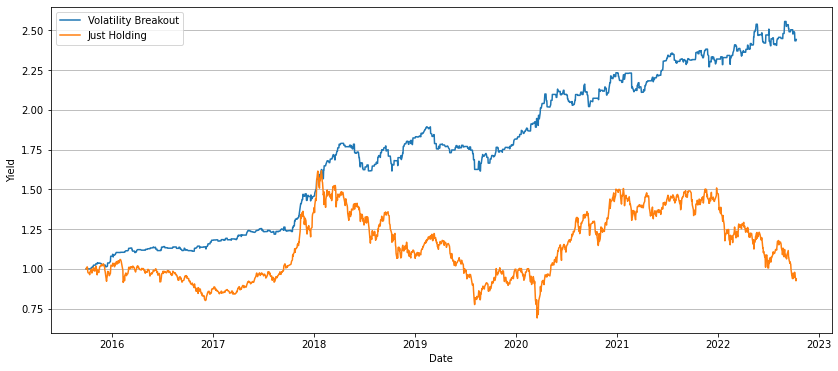

14.677030184261408

In [20]:
# #변동성 돌파 전략
# 투자 전략명	변동성 돌파 전략
# 투자대상	KODEX 코스닥 150(종목코드: 229200)
# 매수 전략	현재 가격이 목표가 돌파시 장중에 매수
# 매도 전략	매수 시 당일 종가에 매도

# !pip install finance-datareader
import FinanceDataReader as fdr
# df_krx = fdr.StockListing('KRX')

df = fdr.DataReader('229200','2015')
df['변동'] = df['High']-df['Low']
df['전일변동'] = df['변동'].shift(1)
df['목표가']  = df['Open'] + df['전일변동'] * 0.5

import numpy as np
df['수익률'] = np.where(df['High'] >= df['목표가'], df['Close']/df['목표가'],1)

df['누적수익률'] = df['수익률'].cumprod()
df.tail()


#연평균수익률 계산
delta = df.index[-1] - df.index[0]
year = delta.days / 365
CAGR = df['누적수익률'].iloc[-1] ** (1/year) -1
print("CAGR: ", CAGR *100)


#ETF ->증권거래세 면제 , 단 증권사 거래수수료 및 슬리피지 코스트 고려해야함
# 수수료 = 0.015%,  매매단위는 5원 

import matplotlib.pyplot as plt

fig = plt.figure(figsize= (14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(df['누적수익률'], label ='Volatility Breakout')
ax.plot(df['Close']/df['Close'].iloc[0], label = "Just Holding")


plt.xlabel('Date')
plt.ylabel('Yield')
plt.grid(True, axis= 'y')
plt.legend()
plt.show()


#MDD계산

df['전고점'] = df['누적수익률'].cummax()
df['DD'] = (1- df['누적수익률'] / df['전고점'] )*100

df['DD'].max()



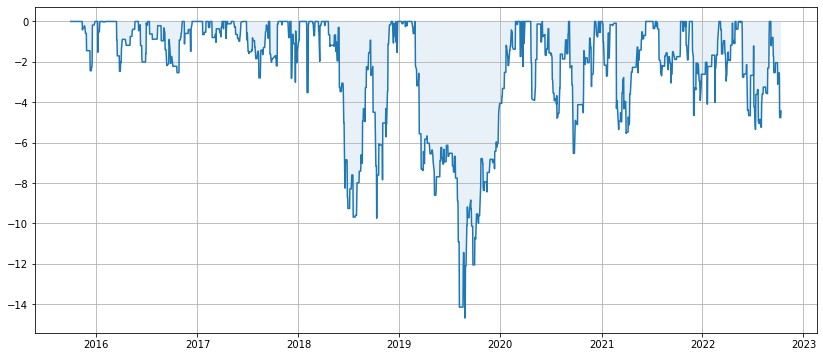

In [21]:
fig = plt.figure(figsize =(14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(df.index, df['DD']*(-1))
ax.fill_between(df.index, df['DD']* -1, alpha = 0.1)
ax.grid()
plt.show()
